In [2]:
from price import Production_Chain
from draw import *
from zipfs import *

In [11]:
def check_condition(pc):
    "condition for at least two levels"
    
    if pc.δ * pc.κ * pc.c(1/pc.κ) + pc.α < pc.c(1):
        print("yes")
    else: print("no")


def m_bar(pc, dc):
    "dc = c'(ell)"
    
    grid = np.linspace(0, 1, 1000)
    x_bar = 0
    for i, x in enumerate(grid):
        x_bar = x
        if dc(x) > pc.δ * dc(0):
            break
    m_bar = -np.log(x_bar) / np.log(pc.κ) +1
    return np.ceil(m_bar), x_bar



def plot_final_prices(pc, dc=lambda x:np.exp(x), max_k=500, plot_levels=True, plot_m_bar=False):

    num_suppliers = np.arange(2, max_k, 1, dtype=np.float)
    final_price = np.empty(len(num_suppliers))
    levels = np.empty(len(num_suppliers))
    m_bars = np.empty(len(num_suppliers))
    
    for i, k in enumerate(num_suppliers):
        pc.κ = k
        final_price[i] = pc.p_func(1)
        if plot_m_bar:
            m_bars[i], x_bar = m_bar(pc, dc)
        levels[i] = pc.level()
    
    
    
    if plot_levels:
        fig, axes = plt.subplots(1, 2, figsize=(12,6))
        axes[0].plot(num_suppliers, final_price, alpha=0.6, label='$p(1)$')
        axes[0].set_xlabel('number of suppliers, n', fontsize=14)
        axes[0].set_ylabel('$p(1)$', fontsize=14)
    
        axes[1].plot(num_suppliers, levels, alpha=0.6, label='$m^*$')
        if plot_m_bar:
            print("x_bar ", x_bar)
            axes[1].plot(num_suppliers, m_bars, alpha=0.6, label=r"$\bar{m}$")
            plt.legend(fontsize=12)
        axes[1].set_xlabel('number of suppliers, n', fontsize=14)
        axes[1].set_ylabel('$m^*$', fontsize=14)
    else:
        fig, axes = plt.subplots(figsize=(10,8))
        axes.plot(num_suppliers, final_price, alpha=0.6, label='$p(1)$')
        axes.set_xlabel('number of suppliers, n', fontsize=14)
        axes.set_ylabel('$p(1)$', fontsize=14)
    plt.show()
    

In [75]:
dc = lambda x: np.exp(x)
m_bar(pc, dc)

2.0

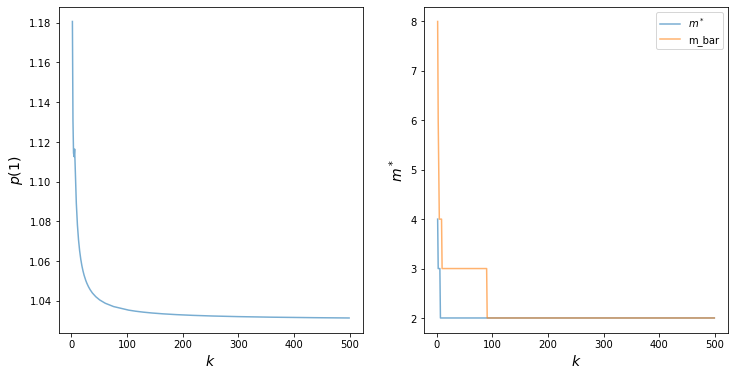

In [76]:
pc = Production_Chain(τ=0.01, α=0.01, κ=2, 
                      c=lambda x: (np.exp(x)-1),
                      proportional_assembly=False)
plot_final_prices(pc, max_k=500, plot_m_bar=True)

x_bar  0.001001001001001001


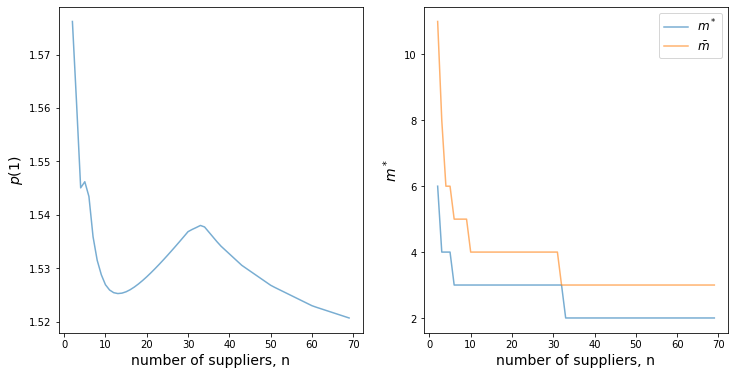

x_bar  0.001001001001001001


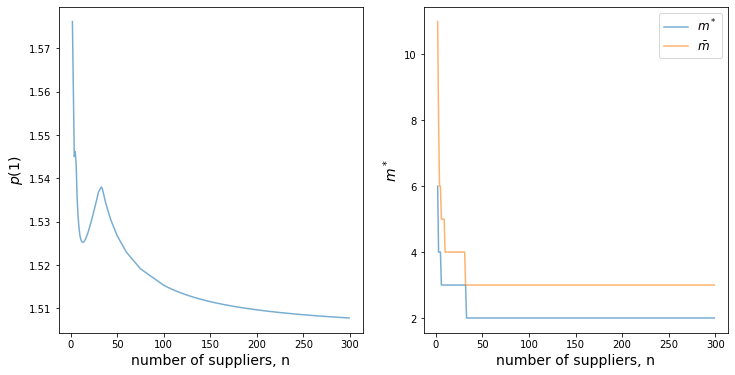

In [14]:
pc = Production_Chain(τ=0.001, α=0.001, κ=2, 
                      c=lambda x: (np.exp(1.5*x)-1),
                      proportional_assembly=False)
plot_final_prices(pc, dc=lambda x: 1.5*np.exp(1.5*x), max_k=70, plot_m_bar=True)

x_bar  0.001001001001001001


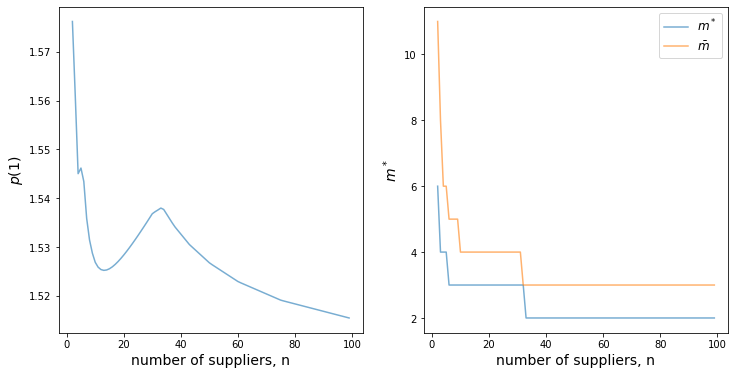

In [21]:
plot_final_prices(pc, dc=lambda x: 1.5*np.exp(1.5*x), max_k=100, plot_m_bar=True)

x_bar  0.001001001001001001


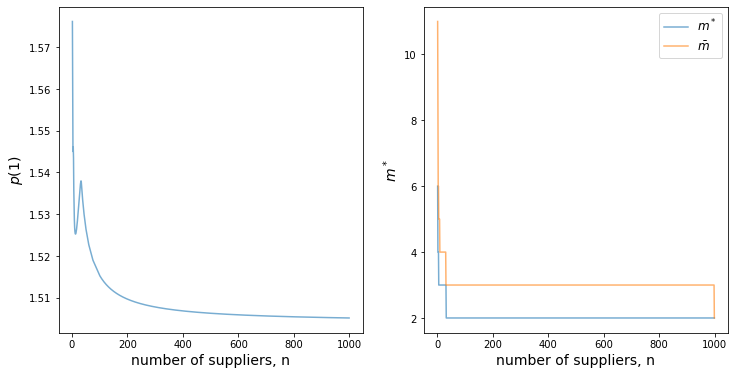

In [22]:
plot_final_prices(pc, dc=lambda x: 1.5*np.exp(1.5*x), max_k=1100, plot_m_bar=True)

Text(0.5, 0, 'number of suppliers, n')

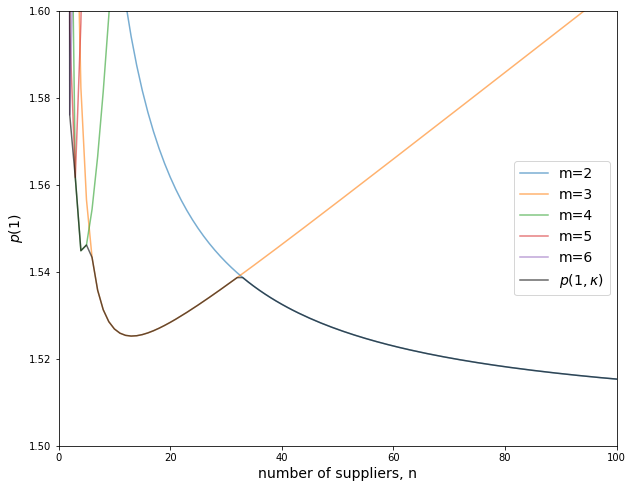

In [20]:
d = 1 / (1 - 0.001)
a = 0.001
c = lambda x: np.exp(1.5*x) - 1
dc = lambda x: 1.5*np.exp(1.5*x)

num_suppliers = np.arange(1, 400, 1, dtype=np.float)

fig, ax = plt.subplots(figsize=(10,8))
for m in range(2, 7):
    p_1m = np.empty(len(num_suppliers))
    for i, k in enumerate(num_suppliers):
        p_1m[i] = (d * k)**(m-1) * d * c(k**(1-m)) + d*a * ((d*k)**(m-1) - 1) / (d*k - 1) 
    if m == 2: 
        p_1k = p_1m
    else:
        p_1k = np.minimum(p_1k, p_1m)
    ax.plot(num_suppliers, p_1m, label="m=%d" %m, alpha=0.6)

ax.plot(num_suppliers, p_1k, c='k', alpha=0.6, label='$p(1, \kappa)$')
plt.legend(fontsize=14)
ax.set_ylim(1.5, 1.6)
ax.set_xlim(0, 100)
ax.set_ylabel("$p(1)$", fontsize=14)
ax.set_xlabel("number of suppliers, n", fontsize=14)

no


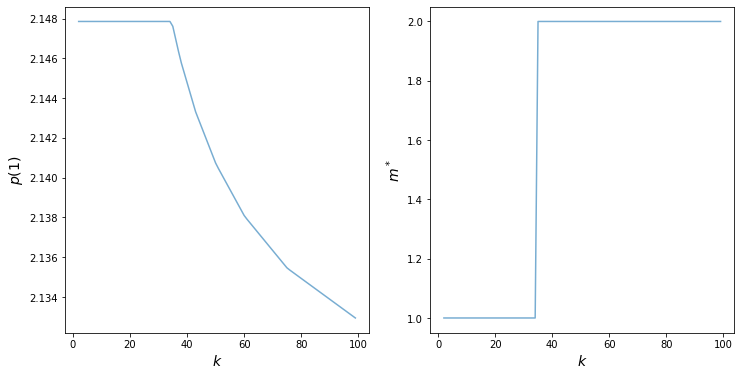

yes


In [84]:
pc = Production_Chain(τ=0.2, α=0.45, κ=2, 
                      c=lambda x: (np.exp(x)-1),
                      proportional_assembly=False)

check_condition(pc)
plot_final_prices(pc, max_k=100)
check_condition(pc)

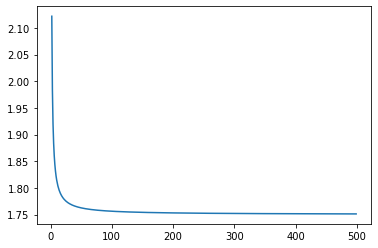

In [33]:
cost = pc.δ * num_suppliers * pc.c(1/num_suppliers) + pc.α
plt.plot(num_suppliers, cost)    
plt.show()

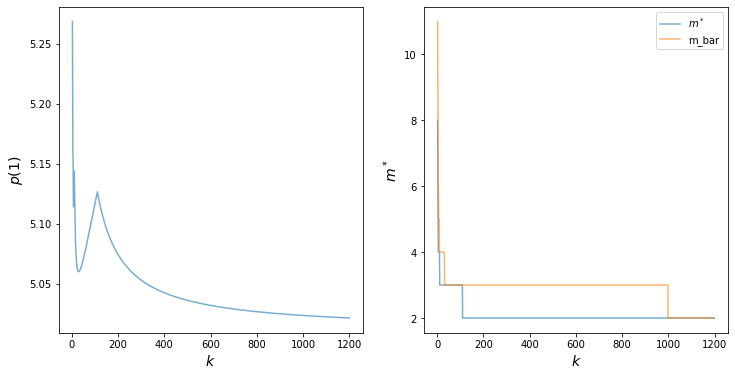

In [87]:
pc = Production_Chain(τ=0.001, α=0.001, κ=2, 
                      c=lambda x: (np.exp(5*x)-1),
                      proportional_assembly=False)

plot_final_prices(pc, dc=lambda x: 5*np.exp(5*x), max_k=1200, plot_m_bar=True)

x_bar  0.001001001001001001


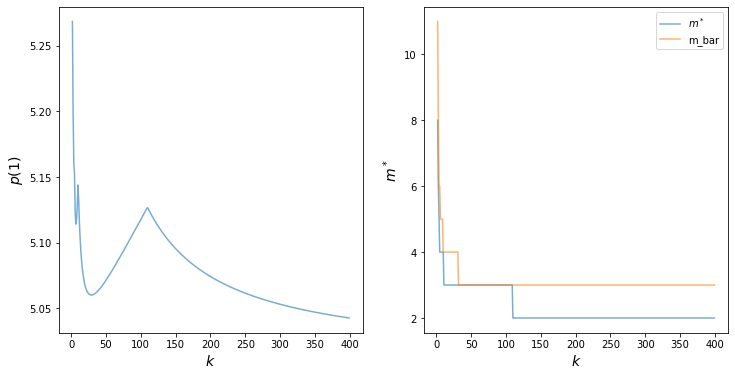

In [129]:
pc = Production_Chain(τ=0.001, α=0.001, κ=2, 
                      c=lambda x: (np.exp(5*x)-1),
                      proportional_assembly=False)

plot_final_prices(pc, dc=lambda x: 5*np.exp(5*x), max_k=400, plot_m_bar=True)

Text(0.5, 0, 'number of suppliers, $\\kappa$')

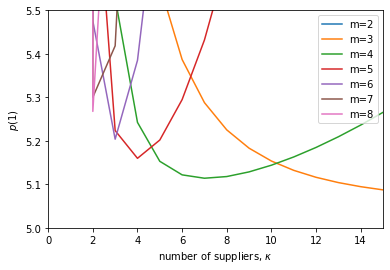

In [195]:
d = 1 / (1 - 0.001)
a = 0.001
c = lambda x: np.exp(5*x) - 1
dc = lambda x: 5*np.exp(5*x)

num_suppliers = np.arange(1, 400, 1, dtype=np.float)

for m in range(2, 9):
    p_1m = np.empty(len(num_suppliers))
    for i, k in enumerate(num_suppliers):
        p_1m[i] = (d * k)**(m-1) * d * c(k**(1-m)) + d*a * ((d*k)**(m-1) - 1) / (d*k - 1) 
    plt.plot(num_suppliers, p_1m, label="m=%d" %m)

plt.legend()
plt.ylim(5, 5.5)
plt.xlim(0, 15)
plt.ylabel("$p(1)$")
plt.xlabel("number of suppliers, $\kappa$")

-0.03059519348655715

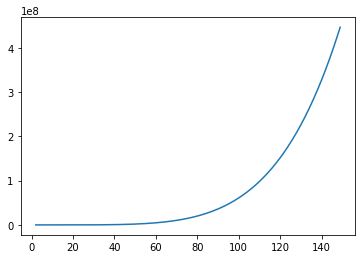

In [194]:
num_suppliers = np.arange(2, 150, 1, dtype=np.float)
dp_dk = np.empty(len(num_suppliers))

m = 8
d, a = 1/(1-0.001), 0.001
c = lambda x: np.exp(5*x) - 1
dc = lambda x: 5*np.exp(5*x)

for i, k in enumerate(num_suppliers):
    dp_dk[i] = d**m * k**(m-2) * (m-1) * c(k**(1-m)) + d**m / k * dc(k**(1-m)) * (1-m) \
                + d * a * ((m-1)*d**(m-1)*k**(m-2)*(d*k-1) - d*((d*k)**(m-1) - 1) ) / (d*k-1)**2

plt.plot(num_suppliers, dp_dk)
dp_dk[0]

no


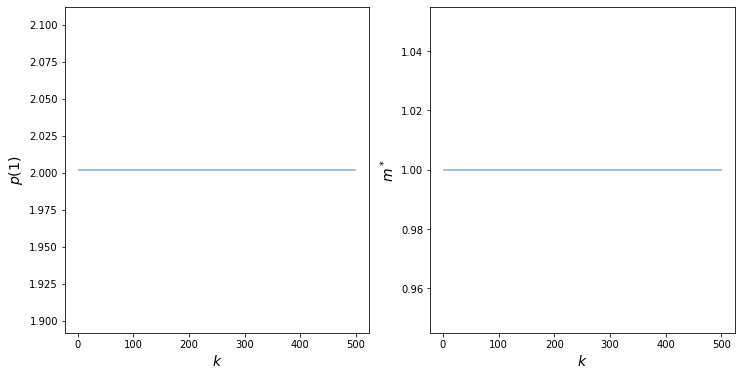

In [18]:
pc = Production_Chain(τ=0.001, α=0.001, κ=2, 
                      c=lambda x: (2*x),
                      proportional_assembly=False)

check_condition(pc)
plot_final_prices(pc)

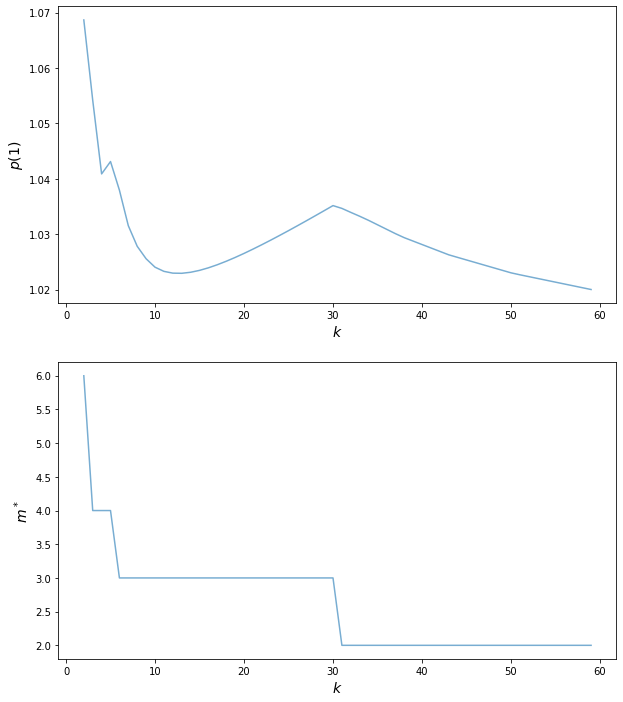

In [127]:
pc = Production_Chain(τ=0.001, α=0.001, κ=2, 
                      c=lambda x: (x + x**2),
                      proportional_assembly=False)

num_suppliers = np.arange(2, 60, 1, dtype=np.float)
final_price = np.empty(len(num_suppliers))
levels = np.empty(len(num_suppliers))

for i, k in enumerate(num_suppliers):
    pc.κ = k
    final_price[i] = pc.p_func(1)
    levels[i] = pc.level()

fig, axes = plt.subplots(2, 1, figsize=(10,12))
axes[0].plot(num_suppliers, final_price, alpha=0.6)
axes[0].set_xlabel('$k$', fontsize=14)
axes[0].set_ylabel('$p(1)$', fontsize=14)
axes[1].plot(num_suppliers, levels, alpha=0.6)
axes[1].set_xlabel('$k$', fontsize=14)
axes[1].set_ylabel('$m^*$', fontsize=14)

plt.show()

8.893426480154044e-05

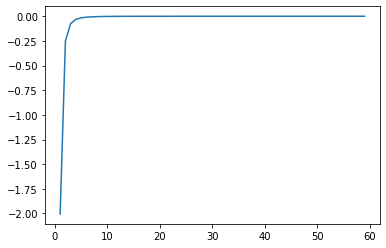

In [174]:
num_suppliers = np.arange(1, 60, 1, dtype=np.float)
dp_dk = np.empty(len(num_suppliers))
m = 3
c = lambda x: x + x**2
d, a = 1/(1-0.001), 0.001
dc = lambda x: 1 + 2*x

for i, k in enumerate(num_suppliers):
    dp_dk[i] = d**m * k**(m-2) * (m-1) * c(k**(1-m)) + d**m / k * dc(k**(1-m)) * (1-m) \
                + d * a * ((m-1)*d**(m-1)*k**(m-2)*(d*k-1) - d*((d*k)**(m-1) - 1) ) / (d*k-1)**2

plt.plot(num_suppliers, dp_dk)
dp_dk[12]

In [133]:
-np.log(0.001) / np.log(30) + 1

3.0309774775865366